# **APRENDIZAGEM SUPERVISIONADA: CLASSIFICAÇÃO**

Este projeto tem por objetivo desenvolver um algoritmo de Machine Learning para prever as fácies a partir de dados de perfis de poços. 

# **PRÉ-PROCESSAMENTO**

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Cursos/Machine Learning com Python/sal_pocos.csv',
                    sep=',', encoding='utf-8')

In [ ]:
df.head()

,PROF,VP,FACIES,VS,GR,POCO
0,3103.0164,4392.102539,85.0,2491.250244,16.139494,poco_1
1,3103.1688,4368.245117,85.0,2502.714111,16.530527,poco_1
2,3103.3212,4354.002930,85.0,2517.204346,16.491985,poco_1
3,3103.4736,4349.213867,85.0,2529.218994,16.053066,poco_1
4,3103.6260,4354.245606,85.0,2535.076172,15.923628,poco_1


In [ ]:
df.shape

(23426, 6)

In [ ]:
df['FACIES'].value_counts()

85.0    19756
82.0     1670
87.0     1580
81.0      420
Name: FACIES, dtype: int64

## **Transformando as variáveis categóricas nominais em variáveis categóricas ordinais**

In [ ]:
df2 = pd.DataFrame.copy(df)

{85:'Halita',82:'Anidrita',87:'Carnalita',81:'Taquidrita'}

In [ ]:
df2['FACIES'].replace({85:0, 82: 1, 87:2, 81:3}, inplace=True)
df2['POCO'].replace({'poco_1':0, 'poco_2': 1}, inplace=True)

In [ ]:
df2.head()

,PROF,VP,FACIES,VS,GR,POCO
0,3103.0164,4392.102539,0.0,2491.250244,16.139494,0
1,3103.1688,4368.245117,0.0,2502.714111,16.530527,0
2,3103.3212,4354.002930,0.0,2517.204346,16.491985,0
3,3103.4736,4349.213867,0.0,2529.218994,16.053066,0
4,3103.6260,4354.245606,0.0,2535.076172,15.923628,0


In [ ]:
df2.dtypes

PROF      float64
VP        float64
FACIES    float64
VS        float64
GR        float64
POCO        int64
dtype: object

In [ ]:
df2.shape

(23426, 6)

In [ ]:
df2['POCO'].value_counts()

0    11884
1    11542
Name: POCO, dtype: int64

In [ ]:
df2['FACIES'].value_counts()

0.0    19756
1.0     1670
2.0     1580
3.0      420
Name: FACIES, dtype: int64

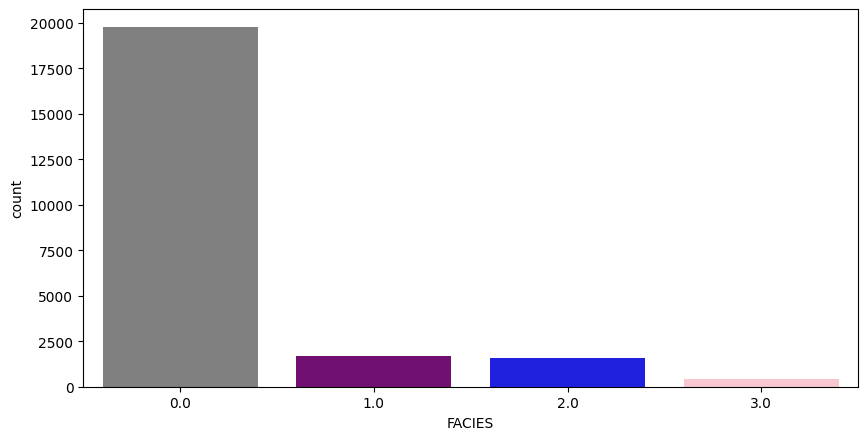

In [ ]:
cor_dict={0:'grey',1:'purple',2:'blue',3:'pink'}
fig = plt.figure(figsize=(10,5), dpi=100)
sns.countplot(x='FACIES', data=df2, palette=cor_dict);

## **LEGENDA**

FACIES - HALITA = 0, ANIDRITA = 1, CARNALITA = 2 , TAQUIDRITA = 3

Cor - HALITA = grey , ANIDRITA = purple, CARNALITA = blue, TAQUIDRITA = pink, 

cor_dict={0:'grey',1:'purple',2:'blue',3:'pink'}


POCO - poco_1 = 0 , poco_2 = 1


## **ATRIBUTOS PREVISORES E ALVO**

In [ ]:
df2.head()

,PROF,VP,FACIES,VS,GR,POCO
0,3103.0164,4392.102539,0.0,2491.250244,16.139494,0
1,3103.1688,4368.245117,0.0,2502.714111,16.530527,0
2,3103.3212,4354.002930,0.0,2517.204346,16.491985,0
3,3103.4736,4349.213867,0.0,2529.218994,16.053066,0
4,3103.6260,4354.245606,0.0,2535.076172,15.923628,0


In [ ]:
previsores = np.c_[df2.iloc[:, 1].values, df2.iloc[:, 3:5].values]

In [ ]:
previsores

array([[4392.1025391 , 2491.2502441 ,   16.13949394],
       [4368.2451172 , 2502.7141113 ,   16.53052712],
       [4354.0029297 , 2517.2043457 ,   16.49198532],
       ...,
       [5594.0039063 , 3157.7043457 ,   23.27806282],
       [5594.0039063 , 3157.7043457 ,   27.87416077],
       [5548.5112305 , 3157.7043457 ,   22.99479866]])

In [ ]:
previsores.shape

(23426, 3)

In [ ]:
alvo = df2.iloc[:, 2].values

In [ ]:
alvo

array([0., 0., 0., ..., 1., 1., 1.])

In [ ]:
alvo.shape

(23426,)

## **Análise das escalas dos atributos (Escalonamento)**

In [ ]:
df2.describe()

,PROF,VP,FACIES,VS,GR,POCO
count,23426.000000,23426.000000,23426.000000,23426.000000,23426.000000,23426.000000
mean,3986.543137,4539.864054,0.259968,2520.558822,15.685612,0.492700
std,516.587381,305.610356,0.659446,184.192511,19.466806,0.499957
min,3083.814000,3025.522217,0.000000,1467.370239,1.124120,0.000000
25%,3539.642400,4493.961792,0.000000,2517.390381,8.619925,0.000000
50%,3985.869600,4525.891602,0.000000,2544.662720,11.447866,0.000000
75%,4432.096800,4550.856934,0.000000,2569.796631,13.016943,1.000000
max,4948.885200,6025.330566,3.000000,3157.704346,245.754974,1.000000


**Padronização (utiliza a média e o desvio padrão como referência).**

**Média zero e desvio padrão igual 1.**


Normalização (utiliza os valores máximo e mínimo como referência).

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
previsores_esc = StandardScaler().fit_transform(previsores)

In [ ]:
previsores_esc

array([[-0.48350675, -0.15912266,  0.0233162 ],
       [-0.56157325, -0.09688283,  0.04340381],
       [-0.60817668, -0.01821218,  0.04142389],
       ...,
       [ 3.44936724,  3.45920212,  0.39002871],
       [ 3.44936724,  3.45920212,  0.62613298],
       [ 3.30050564,  3.45920212,  0.37547726]])

In [ ]:
previsoresdf = pd.DataFrame(previsores_esc)
previsoresdf

,0,1,2
0,-0.483507,-0.159123,0.023316
1,-0.561573,-0.096883,0.043404
2,-0.608177,-0.018212,0.041424
3,-0.623847,0.047018,0.018876
4,-0.607383,0.078818,0.012227
...,...,...,...
23421,3.449367,3.459202,-0.072600
23422,3.449367,3.459202,0.118140
23423,3.449367,3.459202,0.390029
23424,3.449367,3.459202,0.626133


In [ ]:
previsoresdf.describe()

,0,1,2
count,2.342600e+04,2.342600e+04,2.342600e+04
mean,7.279529e-18,2.038268e-15,-4.853020e-17
std,1.000021e+00,1.000021e+00,1.000021e+00
min,-4.955245e+00,-5.717991e+00,-7.480325e-01
25%,-1.502019e-01,-1.720216e-02,-3.629685e-01
50%,-4.572080e-02,1.308653e-01,-2.176955e-01
75%,3.597101e-02,2.673228e-01,-1.370911e-01
max,4.860759e+00,3.459202e+00,1.181880e+01


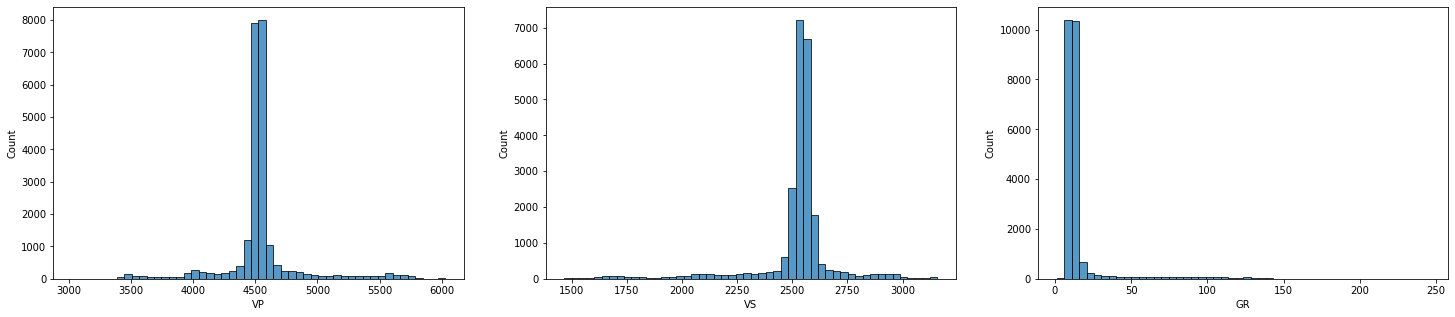

In [ ]:
fig,axes = plt.subplots(nrows=1,ncols=3,figsize=(25,5))
sel = ['VP', 'VS', 'GR']
for i,l in enumerate(sel):
    sns.histplot(df2.loc[:,l],bins=50,kde=False,label=l,ax=axes[i])

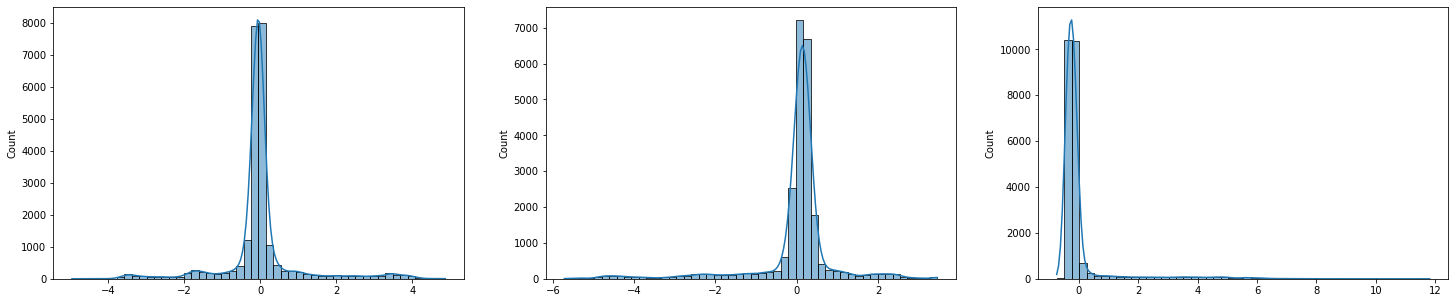

In [ ]:
fig,axes = plt.subplots(nrows=1,ncols=3,figsize=(25,5))
for i in range(0,3):
    sns.histplot(previsores_esc[:,i],bins=50,kde=True,label=l,ax=axes[i])

## **Codificação de variáveis categóricas**

### **LabelEncoder: transformação de variáveis categóricas em numéricas**


In [ ]:
from sklearn.preprocessing import LabelEncoder

In [ ]:
df.head()

,PROF,VP,FACIES,VS,GR,POCO
0,3103.0164,4392.102539,85.0,2491.250244,16.139494,poco_1
1,3103.1688,4368.245117,85.0,2502.714111,16.530527,poco_1
2,3103.3212,4354.002930,85.0,2517.204346,16.491985,poco_1
3,3103.4736,4349.213867,85.0,2529.218994,16.053066,poco_1
4,3103.6260,4354.245606,85.0,2535.076172,15.923628,poco_1


In [ ]:
previsores2 = np.c_[df2.iloc[:, 1].values, df2.iloc[:, 3:5].values]
previsores2

array([[4392.1025391 , 2491.2502441 ,   16.13949394],
       [4368.2451172 , 2502.7141113 ,   16.53052712],
       [4354.0029297 , 2517.2043457 ,   16.49198532],
       ...,
       [5594.0039063 , 3157.7043457 ,   23.27806282],
       [5594.0039063 , 3157.7043457 ,   27.87416077],
       [5548.5112305 , 3157.7043457 ,   22.99479866]])

Outra forma de transformar as variáveis categóricas em numéricas.

Essa forma não se tem tanto controle quanto a anterior. Aqui as fácies estão com números diferentes da anterior. 

In [ ]:
alvo2 = df.iloc[:, 2].values.copy()
alvo2

array([85., 85., 85., ..., 82., 82., 82.])

In [ ]:
alvo2[:] = LabelEncoder().fit_transform(alvo2[:])

In [ ]:
alvo2

array([2., 2., 2., ..., 1., 1., 1.])

In [ ]:
alvo2.shape

(23426,)

### **OneHotEncoder: Criação de variáveis Dummy (fictícia).**

Cuidado com a multicolinearidade (variáveis altamente correlacionadas entre si).

**Transformação para que o algoritmo não atribua um peso para maior para a classe 3 do que para a classe 0.**

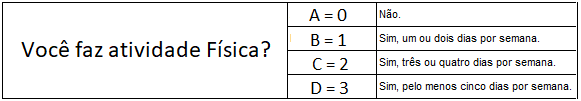

A   B   C   D   
1   0   0   0   
0   1   0   0   
0   0   1   0   
0   0   0   1


In [ ]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

In [ ]:
ColumnTransformer?

Parâmetros ColumnTransformer
- name: nome dado a transformação.
- transformer: tipo de estimador (OneHotEncoder).
- columns: colunas que serão transformadas.
- remainder: o que acontecerá com o restante das colunas não relacionadas: 
1) drop = exclui as outras colunas.
2) passthrough = mantém as outras colunas. drop é default.  
- sparse_threshold: parâmetro de classificação de matrizes esparsas. default é 0.3
- n_jobs: número de trabalhos a serem executados em paralelo. default é nenhum
- transformer_weights: definição de pesos aos transformadores.
-verbose: default é False. se for True a execução é apresentada na tela.

In [ ]:
dados = df.iloc[:, 1:6].values.copy()
dados.shape

(23426, 5)

In [ ]:
dados = ColumnTransformer(transformers=[('OneHot', OneHotEncoder(), [1,4])],
                                remainder='passthrough').fit_transform(dados)

In [ ]:
dados

array([[0.0, 0.0, 1.0, ..., 4392.1025391, 2491.2502441, 16.139493942],
       [0.0, 0.0, 1.0, ..., 4368.2451172, 2502.7141113, 16.530527115],
       [0.0, 0.0, 1.0, ..., 4354.0029297, 2517.2043457, 16.491985321],
       ...,
       [0.0, 1.0, 0.0, ..., 5594.0039063, 3157.7043457, 23.27806282],
       [0.0, 1.0, 0.0, ..., 5594.0039063, 3157.7043457, 27.874160767],
       [0.0, 1.0, 0.0, ..., 5548.5112305, 3157.7043457, 22.99479866]],
      dtype=object)

In [ ]:
dados.shape

(23426, 9)

In [ ]:
dadosdf = pd.DataFrame(dados)
dadosdf.head()

,0,1,2,3,4,5,6,7,8
0,0.0,0.0,1.0,0.0,1.0,0.0,4392.102539,2491.250244,16.139494
1,0.0,0.0,1.0,0.0,1.0,0.0,4368.245117,2502.714111,16.530527
2,0.0,0.0,1.0,0.0,1.0,0.0,4354.00293,2517.204346,16.491985
3,0.0,0.0,1.0,0.0,1.0,0.0,4349.213867,2529.218994,16.053066
4,0.0,0.0,1.0,0.0,1.0,0.0,4354.245606,2535.076172,15.923628


In [ ]:
df.head()

,PROF,VP,FACIES,VS,GR,POCO
0,3103.0164,4392.102539,85.0,2491.250244,16.139494,poco_1
1,3103.1688,4368.245117,85.0,2502.714111,16.530527,poco_1
2,3103.3212,4354.002930,85.0,2517.204346,16.491985,poco_1
3,3103.4736,4349.213867,85.0,2529.218994,16.053066,poco_1
4,3103.6260,4354.245606,85.0,2535.076172,15.923628,poco_1


In [ ]:
ohe = OneHotEncoder()
alvo3 = ohe.fit_transform(df[['FACIES']])
alvo3 = alvo3.toarray()
alvo3

array([[0., 0., 1., 0.],
       [0., 0., 1., 0.],
       [0., 0., 1., 0.],
       ...,
       [0., 1., 0., 0.],
       [0., 1., 0., 0.],
       [0., 1., 0., 0.]])

In [ ]:
alvo3_esc = StandardScaler().fit_transform(alvo3)
alvo3_esc

array([[-0.13511516, -0.27705673,  0.43100621, -0.26893206],
       [-0.13511516, -0.27705673,  0.43100621, -0.26893206],
       [-0.13511516, -0.27705673,  0.43100621, -0.26893206],
       ...,
       [-0.13511516,  3.60936905, -2.32015221, -0.26893206],
       [-0.13511516,  3.60936905, -2.32015221, -0.26893206],
       [-0.13511516,  3.60936905, -2.32015221, -0.26893206]])

## **Escalonamento**

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
dados_esc = StandardScaler().fit_transform(dados)

In [ ]:
dados_esc

array([[-0.13511516, -0.27705673,  0.43100621, ..., -0.48350675,
        -0.15912266,  0.0233162 ],
       [-0.13511516, -0.27705673,  0.43100621, ..., -0.56157325,
        -0.09688283,  0.04340381],
       [-0.13511516, -0.27705673,  0.43100621, ..., -0.60817668,
        -0.01821218,  0.04142389],
       ...,
       [-0.13511516,  3.60936905, -2.32015221, ...,  3.44936724,
         3.45920212,  0.39002871],
       [-0.13511516,  3.60936905, -2.32015221, ...,  3.44936724,
         3.45920212,  0.62613298],
       [-0.13511516,  3.60936905, -2.32015221, ...,  3.30050564,
         3.45920212,  0.37547726]])

In [ ]:
dados2df = pd.DataFrame(dados_esc)
dados2df

,0,1,2,3,4,5,6,7,8
0,-0.135115,-0.277057,0.431006,-0.268932,0.985506,-0.985506,-0.483507,-0.159123,0.023316
1,-0.135115,-0.277057,0.431006,-0.268932,0.985506,-0.985506,-0.561573,-0.096883,0.043404
2,-0.135115,-0.277057,0.431006,-0.268932,0.985506,-0.985506,-0.608177,-0.018212,0.041424
3,-0.135115,-0.277057,0.431006,-0.268932,0.985506,-0.985506,-0.623847,0.047018,0.018876
4,-0.135115,-0.277057,0.431006,-0.268932,0.985506,-0.985506,-0.607383,0.078818,0.012227
...,...,...,...,...,...,...,...,...,...
23421,-0.135115,3.609369,-2.320152,-0.268932,-1.014707,1.014707,3.449367,3.459202,-0.072600
23422,-0.135115,3.609369,-2.320152,-0.268932,-1.014707,1.014707,3.449367,3.459202,0.118140
23423,-0.135115,3.609369,-2.320152,-0.268932,-1.014707,1.014707,3.449367,3.459202,0.390029
23424,-0.135115,3.609369,-2.320152,-0.268932,-1.014707,1.014707,3.449367,3.459202,0.626133


In [ ]:
dados2df.describe()

,0,1,2,3,4,5,6,7,8
count,2.342600e+04,2.342600e+04,2.342600e+04,2.342600e+04,2.342600e+04,2.342600e+04,2.342600e+04,2.342600e+04,2.342600e+04
mean,7.279529e-18,-1.698557e-17,-9.342063e-17,1.091929e-17,3.494174e-16,-3.494174e-16,-4.761298e-14,8.834534e-13,2.863282e-15
std,1.000021e+00,1.000021e+00,1.000021e+00,1.000021e+00,1.000021e+00,1.000021e+00,1.000021e+00,1.000021e+00,1.000021e+00
min,-1.351152e-01,-2.770567e-01,-2.320152e+00,-2.689321e-01,-1.014707e+00,-9.855059e-01,-4.955245e+00,-5.717991e+00,-7.480325e-01
25%,-1.351152e-01,-2.770567e-01,4.310062e-01,-2.689321e-01,-1.014707e+00,-9.855059e-01,-1.502019e-01,-1.720216e-02,-3.629685e-01
50%,-1.351152e-01,-2.770567e-01,4.310062e-01,-2.689321e-01,9.855059e-01,-9.855059e-01,-4.572080e-02,1.308653e-01,-2.176955e-01
75%,-1.351152e-01,-2.770567e-01,4.310062e-01,-2.689321e-01,9.855059e-01,1.014707e+00,3.597101e-02,2.673228e-01,-1.370911e-01
max,7.401094e+00,3.609369e+00,4.310062e-01,3.718411e+00,9.855059e-01,1.014707e+00,4.860759e+00,3.459202e+00,1.181880e+01


## **RESUMO PRÉ-PROCESSAMENTO**

**alvo = variável que se pretende atingir (fácies). Transformadas em númerica.**

**previsores = conjunto de variáveis previsoras, sem escalonar.**

**previsores_esc = conjunto de variáveis previsoras, escalonada.**

alvo2 = variável alvo com as variáveis categóricas transformadas em númerica pelo labelencoder, sem escalonar.

dados = conjunto dos dados com as variáveis categóricas transformadas em numéricas pelo labelencoder e onehotencoder, sem escalonar. Apenas para servir de exemplo.

dados_esc = conjunto de dados transformados pelo labelencoder e onehotencoder escalonado. Apenas para servir de exemplo.

alvo3 = variável alvo com as variáveis categóricas transformadas em númerica pelo labelencoder e onehotencoder, sem escalonar.

alvo3 = variável alvo com as variáveis categóricas transformadas em númerica pelo labelencoder e onehotencoder, escalonada.

## **Redução de dimensionalidade**

Objetivo é selecionar os melhores componentes (atributos) para treinamento do algoritmo, através da análise das correlações entre as variáveis.

### Análise dos Componentes Principais (PCA)

**Seleção de características:** seleciona os melhores atributos e utiliza sem transformações.

**Extração de Características:** Encontra os relacionamentos dos melhores atributos e cria novos atributos.

É um algoritmo de aprendizagem não supervisionada.

Aplica-se em dados linearmente separáveis.

In [ ]:
from sklearn.decomposition import PCA

In [ ]:
pca = PCA(n_components=2)

In [ ]:
previsores_pca = pca.fit_transform(previsores2)

In [ ]:
previsores_pca.shape

(23426, 2)

In [ ]:
# Componentes principais
previsores_pca

array([[  142.8963749 ,   -47.67575345],
       [  157.96878827,   -69.37883704],
       [  163.18003138,   -88.97745104],
       ...,
       [-1230.79999993,   -29.86406648],
       [-1230.69391032,   -29.53609439],
       [-1191.27591257,   -52.38827203]])

In [ ]:
# razão das variáveis explicativas
pca.explained_variance_ratio_

array([0.95463793, 0.04311009])

In [ ]:
# Soma das variáveis explicativas
pca.explained_variance_ratio_.sum()

0.997748016203381

### Kernel PCA

É um algoritmo de aprendizagem não supervisionada.

Aplica-se também em dados linearmente não separáveis.

In [ ]:
from sklearn.decomposition import KernelPCA

In [ ]:
kpca = KernelPCA(n_components=2, kernel='rbf')

In [ ]:
previsores_kernel = kpca.fit_transform(previsores2)

In [ ]:
previsores_kernel.shape

(23426, 2)

In [ ]:
previsores_kernel

array([[-0.05530859, -0.00024314],
       [-0.05530823, -0.00024311],
       [-0.05530837, -0.00024312],
       ...,
       [-0.05530826, -0.00024312],
       [-0.05530826, -0.00024312],
       [-0.05530822, -0.00024311]])

### **Análise do Discriminante Linear (LDA: Linear Discriminant Analysis)**

Algoritmo de aprendizagem supervisionada, pois utiliza a classe como referência para seleção.

Aplicado em situações com muitos atributos previsores e também com o atributo alvo com muitas classes.

In [ ]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
lda = LinearDiscriminantAnalysis(n_components = 3)

In [ ]:
alvo

array([0., 0., 0., ..., 1., 1., 1.])

In [ ]:
previsores_lda = lda.fit_transform(previsores2, alvo)

In [ ]:
previsores_lda

array([[ 0.55791111, -0.96509399,  0.455473  ],
       [ 0.58757876, -1.27045039,  0.75730746],
       [ 0.56534139, -1.54605274,  1.02125305],
       ...,
       [-5.51099107,  3.06383753,  2.92287463],
       [-5.38655078,  3.31122371,  3.18454576],
       [-5.38912627,  2.65109661,  3.15613579]])

In [ ]:
lda.explained_variance_ratio_

array([0.5521339 , 0.33906682, 0.10879928])

In [ ]:
lda.explained_variance_ratio_.sum()

0.9999999999999998

## **Salvando as variáveis (atributos)**

In [ ]:
import pickle

In [ ]:
# Criando arquivo
arq1 = open('welllog.pkl', 'wb')

In [ ]:
# Salvando a variável no arquivo
pickle.dump(alvo, arq1)

In [ ]:
# Fechando arquivo
arq1.close()

In [ ]:
# Lendo arquivo
arq1 = open('welllog.pkl', 'rb')

In [ ]:
# Chamando a variável
alvo = pickle.load(arq1)

In [ ]:
alvo

array([0., 0., 0., ..., 1., 1., 1.])

In [ ]:
# Criando arquivos e Salvando as variáveis
arq2 = open('logs.pkl', 'wb')
pickle.dump(previsores, arq2)

In [ ]:
arq2 = open('logs.pkl', 'rb')

In [ ]:
previsores = pickle.load(arq2)

In [ ]:
previsores

array([[4392.1025391 , 2491.2502441 ,   16.13949394],
       [4368.2451172 , 2502.7141113 ,   16.53052712],
       [4354.0029297 , 2517.2043457 ,   16.49198532],
       ...,
       [5594.0039063 , 3157.7043457 ,   23.27806282],
       [5594.0039063 , 3157.7043457 ,   27.87416077],
       [5548.5112305 , 3157.7043457 ,   22.99479866]])

## **BASE DE TREINO E TESTE**

In [ ]:
from sklearn.model_selection import train_test_split

Parâmetros train_test_split:   
- arrays: nomes dos atributos previsores e alvo.   
- test_size: tamanho em porcentagem dos dados de teste. default é none.   
- train_size: tamanho em porcentagem dos dados de treinamento.default é none.  
- random_state: nomeação de um estado aleatório.   
- shuffle: embaralhamento dos dados aleatórios. Associado com o random_state ocorre o mesmo embaralhamento sempre. Default é True.  
- stratify: Possibilidade de dividir os dados de forma estratificada. Default é None (nesse caso é mantido a proporção, isto é, se tem 30% de zeros e 70% de 1 no dataframe, na separação em treinamento e teste se manterá essa proporção).

In [ ]:
x_treino, x_teste, y_treino, y_teste = train_test_split(previsores_esc, alvo, test_size = 0.3, random_state = 0)

In [ ]:
x_treino.shape

(16398, 3)

In [ ]:
x_teste.shape

(7028, 3)

In [ ]:
y_treino.shape

(16398,)

In [ ]:
y_teste.shape

(7028,)

# **NAIVE BAYES**

https://scikit-learn.org/stable/modules/naive_bayes.html

Treinamento do algoritmo

In [ ]:
from sklearn.naive_bayes import GaussianNB

In [ ]:
naive = GaussianNB()
naive.fit(x_treino, y_treino)

GaussianNB()

Avaliação do algoritmo

In [ ]:
previsoes_naive = naive.predict(x_teste)
previsoes_naive

array([0., 0., 0., ..., 0., 0., 0.])

In [ ]:
y_teste

array([0., 0., 0., ..., 0., 0., 0.])

In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [ ]:
accuracy_score(y_teste, previsoes_naive)

0.942942515651679

In [ ]:
print("Acurácia: %.2f%%" % (accuracy_score(y_teste, previsoes_naive) * 100.0))

Acurácia: 94.29%


In [ ]:
confusion_matrix(y_teste, previsoes_naive)

array([[5702,   92,  112,   13],
       [  65,  430,    5,    0],
       [  57,    4,  380,   27],
       [  11,    0,   15,  115]])

In [ ]:
print(classification_report(y_teste, previsoes_naive))

              precision    recall  f1-score   support

         0.0       0.98      0.96      0.97      5919
         1.0       0.82      0.86      0.84       500
         2.0       0.74      0.81      0.78       468
         3.0       0.74      0.82      0.78       141

    accuracy                           0.94      7028
   macro avg       0.82      0.86      0.84      7028
weighted avg       0.95      0.94      0.94      7028



###**Análise dados de treino**

In [ ]:
previsoes_treino = naive.predict(x_treino)
previsoes_treino

array([0., 0., 0., ..., 0., 0., 0.])

**É importante que a acurácia fique próxima entre os dados de treino e os dados de teste. Caso isso não aconteça, significa que podemos estar tendo um overfitting.**

In [ ]:
accuracy_score(y_treino, previsoes_treino)

0.942371020856202

In [ ]:
confusion_matrix(y_treino, previsoes_treino)

array([[13353,   202,   242,    40],
       [  190,   966,    14,     0],
       [  136,     5,   898,    73],
       [   16,     0,    27,   236]])

In [ ]:
previsoes_total =  naive.predict(previsores)

In [ ]:
previsoes_total

array([0., 0., 0., ..., 1., 1., 1.])

In [ ]:
previsoes_total.shape

(23426,)

In [ ]:
accuracy_score(alvo, previsoes_total)

0.9425424741739947

In [ ]:
print(classification_report(alvo, previsoes_total))

              precision    recall  f1-score   support

         0.0       0.98      0.96      0.97     19756
         1.0       0.82      0.84      0.83      1670
         2.0       0.75      0.81      0.78      1580
         3.0       0.70      0.84      0.76       420

    accuracy                           0.94     23426
   macro avg       0.81      0.86      0.83     23426
weighted avg       0.94      0.94      0.94     23426



**Não existe diferença nos resultados se entrar com os valores escalonados.**

### **Validação Cruzada**

**Serve para verificar se os dados de testes são representativos.**

In [ ]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

**Separando em n número de grupos os dados**

In [ ]:
# Separando os dados em folds
kfold = KFold(n_splits = 30, shuffle=True, random_state = 5)

In [ ]:
# Criando o modelo
modelo = GaussianNB()
resultado = cross_val_score(modelo, previsores, alvo, cv = kfold)
resultado

array([0.94110115, 0.9475032 , 0.92701665, 0.94238156, 0.95390525,
       0.94622279, 0.94878361, 0.92445583, 0.9206146 , 0.95262484,
       0.92957746, 0.93854033, 0.93341869, 0.95518566, 0.95646607,
       0.95262484, 0.95518566, 0.92573624, 0.95134443, 0.95518566,
       0.94878361, 0.92701665, 0.95006402, 0.92957746, 0.94110115,
       0.94366197, 0.9474359 , 0.9474359 , 0.93333333, 0.93974359])

In [ ]:
# Usamos a média e o desvio padrão
print("Acurácia Média: %.2f%%" % (resultado.mean() * 100.0))

Acurácia Média: 94.22%


Naive Bayes = 94,25% (treino e teste) 

94,22% (validação cruzada) - previsores





###**Salvando o resultado do NAIVE BAYES no Dataframe**

In [ ]:
df['FACIES'].value_counts()

85.0    19756
82.0     1670
87.0     1580
81.0      420
Name: FACIES, dtype: int64

In [ ]:
df_Facies = df.copy()

In [ ]:
df_Facies["FACIES_NB"] = previsoes_total
df_Facies['FACIES_NB'].replace({0:85.0, 1:82.0, 2:87.0, 3:81.0}, inplace=True)

In [ ]:
#df_Facies.to_csv('sal_pocos_NB.csv', sep=',', encoding='utf-8', index = False)

In [ ]:
df_Facies

,PROF,VP,FACIES,VS,GR,POCO,FACIES_NB
0,3103.0164,4392.102539,85.0,2491.250244,16.139494,poco_1,85.0
1,3103.1688,4368.245117,85.0,2502.714111,16.530527,poco_1,85.0
2,3103.3212,4354.002930,85.0,2517.204346,16.491985,poco_1,85.0
3,3103.4736,4349.213867,85.0,2529.218994,16.053066,poco_1,85.0
4,3103.6260,4354.245606,85.0,2535.076172,15.923628,poco_1,85.0
...,...,...,...,...,...,...,...
23421,4845.2532,5594.003906,82.0,3157.704346,14.272353,poco_2,82.0
23422,4845.4056,5594.003906,82.0,3157.704346,17.985367,poco_2,82.0
23423,4845.5580,5594.003906,82.0,3157.704346,23.278063,poco_2,82.0
23424,4845.7104,5594.003906,82.0,3157.704346,27.874161,poco_2,82.0


# **MÁQUINAS DE VETORES DE SUPORTE (SVM)**

https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html

In [ ]:
from sklearn.svm import SVC

In [ ]:
svm = SVC(kernel='rbf', random_state=1, C = 2) 
svm.fit(x_treino, y_treino)

SVC(C=2, random_state=1)

In [ ]:
previsoes_svm = svm.predict(x_teste)
previsoes_svm

array([0., 0., 0., ..., 0., 0., 0.])

In [ ]:
y_teste

array([0., 0., 0., ..., 0., 0., 0.])

In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [ ]:
print("Acurácia: %.2f%%" % (accuracy_score(y_teste, previsoes_svm) * 100.0))

Acurácia: 94.99%


In [ ]:
confusion_matrix(y_teste, previsoes_svm)

array([[5816,   30,   63,   10],
       [ 103,  396,    1,    0],
       [  93,    4,  357,   14],
       [  16,    0,   18,  107]])

In [ ]:
print(classification_report(y_teste, previsoes_svm))

              precision    recall  f1-score   support

         0.0       0.96      0.98      0.97      5919
         1.0       0.92      0.79      0.85       500
         2.0       0.81      0.76      0.79       468
         3.0       0.82      0.76      0.79       141

    accuracy                           0.95      7028
   macro avg       0.88      0.82      0.85      7028
weighted avg       0.95      0.95      0.95      7028



###**Análise dados de treino**

In [ ]:
previsoes_treino = svm.predict(x_treino)
previsoes_treino

array([0., 0., 0., ..., 0., 0., 0.])

In [ ]:
accuracy_score(y_treino, previsoes_treino)

0.9480424442005122

In [ ]:
confusion_matrix(y_treino, previsoes_treino)

array([[13600,    82,   126,    29],
       [  296,   874,     0,     0],
       [  211,     5,   856,    40],
       [   25,     0,    38,   216]])

###**Classificação nos dois poços via SVM**



In [ ]:
facies_svm = svm.predict(previsores_esc)

In [ ]:
accuracy_score(alvo, facies_svm)

0.9486041150858021

In [ ]:
confusion_matrix(alvo, facies_svm)

array([[19416,   112,   189,    39],
       [  399,  1270,     1,     0],
       [  304,     9,  1213,    54],
       [   41,     0,    56,   323]])

In [ ]:
print(classification_report(alvo, facies_svm))

              precision    recall  f1-score   support

         0.0       0.96      0.98      0.97     19756
         1.0       0.91      0.76      0.83      1670
         2.0       0.83      0.77      0.80      1580
         3.0       0.78      0.77      0.77       420

    accuracy                           0.95     23426
   macro avg       0.87      0.82      0.84     23426
weighted avg       0.95      0.95      0.95     23426



In [ ]:
df_Facies

,PROF,VP,FACIES,VS,GR,POCO,FACIES_NB,FACIES_SVM
0,3103.0164,4392.102539,85.0,2491.250244,16.139494,poco_1,85.0,85.0
1,3103.1688,4368.245117,85.0,2502.714111,16.530527,poco_1,85.0,85.0
2,3103.3212,4354.002930,85.0,2517.204346,16.491985,poco_1,85.0,85.0
3,3103.4736,4349.213867,85.0,2529.218994,16.053066,poco_1,85.0,85.0
4,3103.6260,4354.245606,85.0,2535.076172,15.923628,poco_1,85.0,85.0
...,...,...,...,...,...,...,...,...
23421,4845.2532,5594.003906,82.0,3157.704346,14.272353,poco_2,82.0,82.0
23422,4845.4056,5594.003906,82.0,3157.704346,17.985367,poco_2,82.0,82.0
23423,4845.5580,5594.003906,82.0,3157.704346,23.278063,poco_2,82.0,82.0
23424,4845.7104,5594.003906,82.0,3157.704346,27.874161,poco_2,82.0,82.0


### **Validação Cruzada**

In [ ]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

In [ ]:
# Separando os dados em folds
kfold = KFold(n_splits = 30, shuffle=True, random_state = 5)

In [ ]:
# Criando o modelo
modelo = SVC(kernel='rbf', random_state=1, C = 2) 
resultado = cross_val_score(modelo, previsores_esc, alvo, cv = kfold)

# Usamos a média e o desvio padrão
print("Acurácia Média: %.2f%%" % (resultado.mean() * 100.0))

Acurácia Média: 94.74%


Naive Bayes = 94,25% (treino e teste) 94,22% (validação cruzada) - previsores

SVM = 94,80 (treino e teste) e 94,74% (validação cruzada) : previsores-esc - SVC(kernel='rbf', random_state=1, C = 2)



##**Salvando a classificação via SVM no Dataframe**

In [ ]:
#df_Facies.drop('FACIES_SVM', inplace=True, axis=1) # Remove uma coluna

In [ ]:
df_Facies["FACIES_SVM"] = facies_svm
df_Facies['FACIES_SVM'].replace({0:85.0, 1:82.0, 2:87.0, 3:81.0}, inplace=True)

In [ ]:
df_Facies

,PROF,VP,FACIES,VS,GR,POCO,FACIES_NB,FACIES_SVM
0,3103.0164,4392.102539,85.0,2491.250244,16.139494,poco_1,85.0,85.0
1,3103.1688,4368.245117,85.0,2502.714111,16.530527,poco_1,85.0,85.0
2,3103.3212,4354.002930,85.0,2517.204346,16.491985,poco_1,85.0,85.0
3,3103.4736,4349.213867,85.0,2529.218994,16.053066,poco_1,85.0,85.0
4,3103.6260,4354.245606,85.0,2535.076172,15.923628,poco_1,85.0,85.0
...,...,...,...,...,...,...,...,...
23421,4845.2532,5594.003906,82.0,3157.704346,14.272353,poco_2,82.0,82.0
23422,4845.4056,5594.003906,82.0,3157.704346,17.985367,poco_2,82.0,82.0
23423,4845.5580,5594.003906,82.0,3157.704346,23.278063,poco_2,82.0,82.0
23424,4845.7104,5594.003906,82.0,3157.704346,27.874161,poco_2,82.0,82.0


In [ ]:
df_Facies.to_csv('sal_pocos_facies.csv', sep=',', encoding='utf-8', index = False)

# **REGRESSÃO LOGÍSTICA**

https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
logistica = LogisticRegression(random_state=1, max_iter=600, penalty="l2",
                               tol=0.0001, C=1,solver="lbfgs")
logistica.fit(x_treino, y_treino)

LogisticRegression(C=1, max_iter=600, random_state=1)

In [ ]:
logistica.intercept_

array([ 3.57315796, -0.56975176, -0.22637437, -2.77703182])

In [ ]:
logistica.coef_

array([[-1.40952929,  1.40733582, -0.69202468],
       [ 2.04594629,  0.62095829,  0.34697728],
       [-0.03774752, -0.77324592,  0.91559585],
       [-0.59866947, -1.25504819, -0.57054845]])

In [ ]:
previsoes_logistica = logistica.predict(x_teste)
previsoes_logistica

array([0., 0., 0., ..., 0., 0., 0.])

In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [ ]:
print("Acurácia: %.2f%%" % (accuracy_score(y_teste, previsoes_logistica) * 100.0))

Acurácia: 94.82%


In [ ]:
confusion_matrix(y_teste, previsoes_logistica)

array([[5830,   34,   44,   11],
       [  94,  406,    0,    0],
       [ 120,    7,  323,   18],
       [  18,    0,   18,  105]])

In [ ]:
print(classification_report(y_teste, previsoes_logistica))

              precision    recall  f1-score   support

         0.0       0.96      0.98      0.97      5919
         1.0       0.91      0.81      0.86       500
         2.0       0.84      0.69      0.76       468
         3.0       0.78      0.74      0.76       141

    accuracy                           0.95      7028
   macro avg       0.87      0.81      0.84      7028
weighted avg       0.95      0.95      0.95      7028



**Análise dados de treino**

In [ ]:
previsoes_treino = logistica.predict(x_treino)
previsoes_treino

array([0., 0., 0., ..., 0., 0., 0.])

In [ ]:
accuracy_score(y_treino, previsoes_treino)

0.9449323088181486

In [ ]:
confusion_matrix(y_treino, previsoes_treino)

array([[13617,    93,    99,    28],
       [  278,   892,     0,     0],
       [  276,    12,   774,    50],
       [   33,     0,    34,   212]])

### **Validação Cruzada**

In [ ]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

In [ ]:
# Separando os dados em folds
kfold = KFold(n_splits = 30, shuffle=True, random_state = 5)

In [ ]:
# Criando o modelo
modelo = LogisticRegression(random_state=1, max_iter=600, penalty="l2",
                               tol=0.0001, C=1,solver="lbfgs")
resultado = cross_val_score(modelo, previsores, alvo, cv = kfold)

# Usamos a média e o desvio padrão
print("Acurácia Média: %.2f%%" % (resultado.mean() * 100.0))

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


Acurácia Média: 92.26%


###**Classificação nos dois poços via Regressão Logística**

In [ ]:
facies_rl = logistica.predict(previsores_esc)

In [ ]:
accuracy_score(alvo, facies_rl)

0.9459147955263383

In [ ]:
confusion_matrix(alvo, facies_rl)

array([[19447,   127,   143,    39],
       [  372,  1298,     0,     0],
       [  396,    19,  1097,    68],
       [   51,     0,    52,   317]])

In [ ]:
print(classification_report(alvo, facies_rl))

              precision    recall  f1-score   support

         0.0       0.96      0.98      0.97     19756
         1.0       0.90      0.78      0.83      1670
         2.0       0.85      0.69      0.76      1580
         3.0       0.75      0.75      0.75       420

    accuracy                           0.95     23426
   macro avg       0.86      0.80      0.83     23426
weighted avg       0.94      0.95      0.94     23426



Naive Bayes = 94,25% (treino e teste) 94,22% (validação cruzada) - previsores

SVM = 94,80 (treino e teste) e 94,74% (validação cruzada) : previsores_esc - SVC(kernel='rbf', random_state=1, C = 2)

Regressão logística = 94,59% e % (validação cruzada) : previsores_esc - LogisticRegression(random_state=1, max_iter=600, penalty="l2", tol=0.0001, C=1,solver="lbfgs")

# **APRENDIZAGEM BASEADA EM INSTÂNCIAS (KNN)**

https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
knn = KNeighborsClassifier(n_neighbors=7, metric='minkowski', p=1)
knn.fit(x_treino, y_treino)

https://scikit-learn.org/stable/modules/generated/sklearn.metrics.DistanceMetric.html

In [ ]:
previsoes_knn = knn.predict(x_teste)
previsoes_knn

In [ ]:
y_teste

In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [ ]:
print("Acurácia: %.2f%%" % (accuracy_score(y_teste, previsoes_knn) * 100.0))

In [ ]:
confusion_matrix(y_teste, previsoes_knn)

In [ ]:
print(classification_report(y_teste, previsoes_knn))

**Análise dados de treino**

In [ ]:
previsoes_treino = knn.predict(x_treino)
previsoes_treino

In [ ]:
accuracy_score(y_treino, previsoes_treino)

In [ ]:
confusion_matrix(y_treino, previsoes_treino)

### **Validação Cruzada**

In [ ]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

In [ ]:
# Separando os dados em folds
kfold = KFold(n_splits = 30, shuffle=True, random_state = 5)

In [ ]:
# Criando o modelo
modelo = KNeighborsClassifier(n_neighbors=7, metric='minkowski', p = 1)
resultado = cross_val_score(modelo, previsores3_esc, alvo, cv = kfold)

# Usamos a média e o desvio padrão
print("Acurácia Média: %.2f%%" % (resultado.mean() * 100.0))

Naive Bayes = 84,78% (treino e teste) - 234 acertos e 85,17% (validação cruzada) : previsores3_esc

SVM = 86,23% - 238 acertos e 85,72% (validação cruzada) : previsores3-esc - SVC(kernel='rbf', random_state=1, C = 2)

Regressão logística = 86,23% - 238 acertos e 85,83% (validação cruzada) : previsores3_esc - LogisticRegression(random_state=1, max_iter=600, penalty="l2", tol=0.0001, C=1,solver="lbfgs")

KNN = 84,06% - 232 acertos e 85,84% (validação cruzada) : previsores3_esc ou previsores_esc - KNeighborsClassifier(n_neighbors=7, metric='minkowski', p = 1) 



# **ÁRVORE DE DECISÃO**

https://scikit-learn.org/stable/modules/tree.html

In [ ]:
from sklearn.tree import DecisionTreeClassifier

In [ ]:
arvore = DecisionTreeClassifier(criterion='entropy', random_state = 0, max_depth=3)
arvore.fit(x_treino, y_treino)

In [ ]:
previsoes_arvore = arvore.predict(x_teste)
previsoes_arvore

In [ ]:
y_teste

In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [ ]:
print("Acurácia: %.2f%%" % (accuracy_score(y_teste, previsoes_arvore) * 100.0))

In [ ]:
confusion_matrix(y_teste, previsoes_arvore)

In [ ]:
print(classification_report(y_teste, previsoes_arvore))

**Análise dados de treino**

In [ ]:
previsoes_treino = arvore.predict(x_treino)
previsoes_treino

In [ ]:
accuracy_score(y_treino, previsoes_treino)

In [ ]:
confusion_matrix(y_treino, previsoes_treino)

### **Validação Cruzada**

In [ ]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

In [ ]:
# Separando os dados em folds
kfold = KFold(n_splits = 30, shuffle=True, random_state = 5)

In [ ]:
# Criando o modelo
modelo = DecisionTreeClassifier(criterion='entropy', random_state = 0, max_depth=3)
resultado = cross_val_score(modelo, previsores3_esc, alvo, cv = kfold)

# Usamos a média e o desvio padrão
print("Acurácia Média: %.2f%%" % (resultado.mean() * 100.0))

Naive Bayes = 84,78% (treino e teste) - 234 acertos e 85,17% (validação cruzada) : previsores3_esc

SVM = 86,23% - 238 acertos e 85,72% (validação cruzada) : previsores3-esc - SVC(kernel='rbf', random_state=1, C = 2)

Regressão logística = 86,23% - 238 acertos e 85,83% (validação cruzada) : previsores3_esc - LogisticRegression(random_state=1, max_iter=600, penalty="l2", tol=0.0001, C=1,solver="lbfgs")

KNN = 84,06% - 232 acertos e 85,84% (validação cruzada) : previsores3_esc ou previsores_esc - KNeighborsClassifier(n_neighbors=7, metric='minkowski', p = 1)

Árvore de decisão = 83,7% (treino e teste) - 231 acertos e 83,32% (validação cruzada): previsores3_esc - DecisionTreeClassifier(criterion='entropy', random_state = 0, max_depth=3)

# **RANDOM FOREST**

https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
random = RandomForestClassifier(n_estimators=150, criterion='entropy', random_state = 0, max_depth=4)
random.fit(x_treino, y_treino)

In [ ]:
previsoes_random = random.predict(x_teste)
previsoes_random

In [ ]:
y_teste

In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [ ]:
print("Acurácia: %.2f%%" % (accuracy_score(y_teste, previsoes_random) * 100.0))

In [ ]:
confusion_matrix(y_teste, previsoes_random)

In [ ]:
print(classification_report(y_teste, previsoes_random))

**Análise dados de treino**

In [ ]:
previsoes_treino = random.predict(x_treino)
previsoes_treino

In [ ]:
accuracy_score(y_treino, previsoes_treino)

In [ ]:
confusion_matrix(y_treino, previsoes_treino)

### **Validação Cruzada**

In [ ]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

In [ ]:
# Separando os dados em folds
kfold = KFold(n_splits = 30, shuffle=True, random_state = 5)

In [ ]:
# Criando o modelo
modelo = RandomForestClassifier(n_estimators=150, criterion='entropy', random_state = 0, max_depth=4)
resultado = cross_val_score(modelo, previsores, alvo, cv = kfold)

# Usamos a média e o desvio padrão
print("Acurácia Média: %.2f%%" % (resultado.mean() * 100.0))

Naive Bayes = 84,78% (treino e teste) - 234 acertos e 85,17% (validação cruzada) : previsores3_esc

SVM = 86,23% - 238 acertos e 85,72% (validação cruzada) : previsores3-esc - SVC(kernel='rbf', random_state=1, C = 2)

Regressão logística = 86,23% - 238 acertos e 85,83% (validação cruzada) : previsores3_esc - LogisticRegression(random_state=1, max_iter=600, penalty="l2", tol=0.0001, C=1,solver="lbfgs")

KNN = 84,06% - 232 acertos e 85,84% (validação cruzada) : previsores3_esc ou previsores_esc - KNeighborsClassifier(n_neighbors=7, metric='minkowski', p = 1)

Árvore de decisão = 83,7% (treino e teste) - 231 acertos e 83,32% (validação cruzada): previsores3_esc - DecisionTreeClassifier(criterion='entropy', random_state = 0, max_depth=3)

Random Forest = 86,59% - 239 acertos e 85,92% (validação cruzada) : previsores - RandomForestClassifier(n_estimators=150, criterion='entropy', random_state = 0, max_depth=4)

# **XGBOOST**

https://xgboost.readthedocs.io/en/stable/

In [ ]:
from xgboost import XGBClassifier

In [ ]:
xg = XGBClassifier(max_depth=2, learning_rate=0.05, n_estimators=250, objective='binary:logistic', random_state=3)
xg.fit(x_treino,y_treino)

In [ ]:
previsoes_xg = xg.predict(x_teste)
previsoes_xg

In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [ ]:
print("Acurácia: %.2f%%" % (accuracy_score(y_teste, previsoes_xg) * 100.0))

In [ ]:
confusion_matrix(y_teste, previsoes_xg)

In [ ]:
print(classification_report(y_teste, previsoes_xg))

**Análise dados de treino**

In [ ]:
previsoes_treino = xg.predict(x_treino)
previsoes_treino

In [ ]:
accuracy_score(y_treino, previsoes_treino)

In [ ]:
confusion_matrix(y_treino, previsoes_treino)

### **Validação Cruzada**

In [ ]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

In [ ]:
# Separando os dados em folds
kfold = KFold(n_splits = 30, shuffle=True, random_state = 5)

In [ ]:
# Criando o modelo
modelo = XGBClassifier(max_depth=2, learning_rate=0.05, n_estimators=250, objective='binary:logistic', random_state=3)
resultado = cross_val_score(modelo, previsores, alvo, cv = kfold)

# Usamos a média e o desvio padrão
print("Acurácia Média: %.2f%%" % (resultado.mean() * 100.0))

Naive Bayes = 84,78% (treino e teste) - 234 acertos e 85,17% (validação cruzada) : previsores3_esc

SVM = 86,23% - 238 acertos e 85,72% (validação cruzada) : previsores3-esc - SVC(kernel='rbf', random_state=1, C = 2)

Regressão logística = 86,23% - 238 acertos e 85,83% (validação cruzada) : previsores3_esc - LogisticRegression(random_state=1, max_iter=600, penalty="l2", tol=0.0001, C=1,solver="lbfgs")

KNN = 84,06% - 232 acertos e 85,84% (validação cruzada) : previsores3_esc ou previsores_esc - KNeighborsClassifier(n_neighbors=7, metric='minkowski', p = 1)

Árvore de decisão = 83,7% (treino e teste) - 231 acertos e 83,32% (validação cruzada): previsores3_esc - DecisionTreeClassifier(criterion='entropy', random_state = 0, max_depth=3)

Random Forest = 86,59% - 239 acertos e 85,92% (validação cruzada) : previsores - RandomForestClassifier(n_estimators=150, criterion='entropy', random_state = 0, max_depth=4)

XGboost = 87,68% - 242 acertos e 87,13% (validação cruzada) : previsores - XGBClassifier(max_depth=2, learning_rate=0.05, n_estimators=250, objective='binary:logistic', random_state=3)

# **LIGHTGBM**

https://lightgbm.readthedocs.io/en/latest/pythonapi/lightgbm.train.html

In [ ]:
# Instalação do Algoritmo
!pip install lightgbm

In [ ]:
import lightgbm as lgb 

In [ ]:
# Dataset para treino
dataset = lgb.Dataset(x_treino,label=y_treino)

**Hiperparâmetros**

**Controle de ajuste**

num_leaves : define o número de folhas a serem formadas em uma árvore. Não tem uma relação direta entre num_leaves e max_depth e, portanto, os dois não devem estar vinculados um ao outro.

max_depth : especifica a profundidade máxima ou nível até o qual a árvore pode crescer.

**Controle de velocidade**

learning_rate: taxa de aprendizagem, determina o impacto de cada árvore no resultado final.

max_bin : O valor menor de max_bin reduz muito tempo de procesamento, pois agrupa os valores do recurso em caixas discretas, o que é computacionalmente mais barato.

**Controle de precisão**

num_leaves : valor alto produz árvores mais profundas com maior precisão, mas leva ao overfitting. 

max_bin : valores altos tem efeito semelhante ao causado pelo aumento do valor de num_leaves e também torna mais lento o procedimento de treinamento.

In [ ]:
# Parâmetros
parametros = {'num_leaves':250, # número de folhas
              'objective':'binary', # classificação Binária     
              'max_depth':2,
              'learning_rate':.05,
              'max_bin':100}

In [ ]:
lgbm=lgb.train(parametros,dataset,num_boost_round=200)

In [ ]:
# Marcação do tempo de execução
from datetime import datetime
inicio=datetime.now()
lgbm=lgb.train(parametros,dataset)
fim=datetime.now()

tempo = fim - inicio
tempo

In [ ]:
previsoes_lgbm = lgbm.predict(x_teste)
previsoes_lgbm

In [ ]:
previsoes_lgbm.shape

In [ ]:
# Quando for menor que 5 considera 0 e quando for maior ou igual a 5 considera 1
for i in range(0, 276):
    if previsoes_lgbm[i] >= .5:       
       previsoes_lgbm[i] = 1
    else:  
       previsoes_lgbm[i] = 0

In [ ]:
previsoes_lgbm

In [ ]:
y_teste

In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [ ]:
print("Acurácia: %.2f%%" % (accuracy_score(y_teste, previsoes_lgbm) * 100.0))

In [ ]:
confusion_matrix(y_teste, previsoes_lgbm)

**Análise dados de treino**

In [ ]:
previsoes_treino = lgbm.predict(x_treino)
previsoes_treino

In [ ]:
previsoes_treino.shape

In [ ]:
# Quando for menor que 5 considera 0 e quando for maior ou igual a 5 considera 1
for i in range(0, 641):
    if previsoes_treino[i] >= .5:       
       previsoes_treino[i] = 1
    else:  
       previsoes_treino[i] = 0

In [ ]:
previsoes_treino

In [ ]:
accuracy_score(y_treino, previsoes_treino)

In [ ]:
confusion_matrix(y_treino, previsoes_treino)

### **Validação Cruzada**

In [ ]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

In [ ]:
# Separando os dados em folds
kfold = KFold(n_splits = 30, shuffle=True, random_state = 5)

In [ ]:
# Criando o modelo
modelo = lgb.LGBMClassifier(num_leaves = 250, objective = 'binary',     
                            max_depth = 2, learning_rate = .05, max_bin =100)
resultado = cross_val_score(modelo, previsores, alvo, cv = kfold)

# Usamos a média e o desvio padrão
print("Acurácia Média: %.2f%%" % (resultado.mean() * 100.0))

Naive Bayes = 84,78% (treino e teste) - 234 acertos e 85,17% (validação cruzada) : previsores3_esc

SVM = 86,23% - 238 acertos e 85,72% (validação cruzada) : previsores3-esc - SVC(kernel='rbf', random_state=1, C = 2)

Regressão logística = 86,23% - 238 acertos e 85,83% (validação cruzada) : previsores3_esc - LogisticRegression(random_state=1, max_iter=600, penalty="l2", tol=0.0001, C=1,solver="lbfgs")

KNN = 84,06% - 232 acertos e 85,84% (validação cruzada) : previsores3_esc ou previsores_esc - KNeighborsClassifier(n_neighbors=7, metric='minkowski', p = 1)

Árvore de decisão = 83,7% (treino e teste) - 231 acertos e 83,32% (validação cruzada): previsores3_esc - DecisionTreeClassifier(criterion='entropy', random_state = 0, max_depth=3)

Random Forest = 86,59% - 239 acertos e 85,92% (validação cruzada) : previsores - RandomForestClassifier(n_estimators=150, criterion='entropy', random_state = 0, max_depth=4)

XGboost = 87,68% - 242 acertos e 87,13% (validação cruzada) : previsores - XGBClassifier(max_depth=2, learning_rate=0.05, n_estimators=250, objective='binary:logistic', random_state=3)

LightGBM = 86,23% (treino e teste)- 238 acertos e 85,93% (validação cruzada) : previsores - lgb.LGBMClassifier(num_leaves = 250, objective = 'binary',  max_depth = 2, learning_rate = .05, max_bin =100)

# **CATBOOST**

https://catboost.ai/en/docs/

In [ ]:
#Instalação
!pip install catboost

In [ ]:
from catboost import CatBoostClassifier

In [ ]:
df

In [ ]:
previsores4 = df.iloc[:, 0:11]

In [ ]:
previsores4.head()

In [ ]:
alvo4 = df.iloc[:, 11]

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
x_treino, x_teste, y_treino, y_teste = train_test_split(previsores4, alvo4, test_size = 0.3, random_state = 0)

In [ ]:
categoricas = ['Sex','ChestPainType', 'RestingECG', 'ExerciseAngina', 'ST_Slope']

In [ ]:
catboost = CatBoostClassifier(task_type='CPU', iterations=100, learning_rate=0.1, depth = 8, random_state = 5, 
                              eval_metric="Accuracy")

In [ ]:
catboost.fit( x_treino, y_treino, cat_features= categoricas, plot=True, eval_set=(x_teste, y_teste))

In [ ]:
previsoes_cat = catboost.predict(x_teste)
previsoes_cat

In [ ]:
y_teste

In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [ ]:
print("Acurácia: %.2f%%" % (accuracy_score(y_teste, previsoes_cat) * 100.0))

In [ ]:
confusion_matrix(y_teste, previsoes_cat)

**Análise dados de treino**

In [ ]:
previsoes_treino = catboost.predict(x_treino)
previsoes_treino

In [ ]:
accuracy_score(y_treino, previsoes_treino)

In [ ]:
confusion_matrix(y_treino, previsoes_treino)

### **Validação Cruzada**

In [ ]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

In [ ]:
# Separando os dados em folds
kfold = KFold(n_splits = 30, shuffle=True, random_state = 5)

In [ ]:
# Criando o modelo
modelo = CatBoostClassifier(task_type='CPU', iterations=100, learning_rate=0.1, depth = 8, random_state = 5, 
                              eval_metric="Accuracy")
resultado = cross_val_score(modelo, previsores, alvo, cv = kfold)

# Usamos a média e o desvio padrão
print("Acurácia Média: %.2f%%" % (resultado.mean() * 100.0))

Naive Bayes = 84,78% (treino e teste) - 234 acertos e 85,17% (validação cruzada) : previsores3_esc

SVM = 86,23% - 238 acertos e 85,72% (validação cruzada) : previsores3-esc - SVC(kernel='rbf', random_state=1, C = 2)

Regressão logística = 86,23% - 238 acertos e 85,83% (validação cruzada) : previsores3_esc - LogisticRegression(random_state=1, max_iter=600, penalty="l2", tol=0.0001, C=1,solver="lbfgs")

KNN = 84,06% - 232 acertos e 85,84% (validação cruzada) : previsores3_esc ou previsores_esc - KNeighborsClassifier(n_neighbors=7, metric='minkowski', p = 1)

Árvore de decisão = 83,7% (treino e teste) - 231 acertos e 83,32% (validação cruzada): previsores3_esc - DecisionTreeClassifier(criterion='entropy', random_state = 0, max_depth=3)

Random Forest = 86,59% - 239 acertos e 85,92% (validação cruzada) : previsores - RandomForestClassifier(n_estimators=150, criterion='entropy', random_state = 0, max_depth=4)

**XGboost = 87,68% - 242 acertos e 87,13% (validação cruzada) : previsores - XGBClassifier(max_depth=2, learning_rate=0.05, n_estimators=250, objective='binary:logistic', random_state=3)**

LightGBM = 86,23% (treino e teste)- 238 acertos e 85,93% (validação cruzada) : previsores - lgb.LGBMClassifier(num_leaves = 250, objective = 'binary',  max_depth = 2, learning_rate = .05, max_bin =100)

CatBoost = 86,96% (treino e teste) previsores4 - 240 acertos e 88% (validação cruzada com previsores) - CatBoostClassifier(task_type='CPU', iterations=100, learning_rate=0.1, depth = 8, random_state = 5, eval_metric="Accuracy")

# **Salvando dados para Deploy**

In [ ]:
previsores

array([[40. ,  0. ,  1. , ...,  0. ,  0. ,  0. ],
       [49. ,  1. ,  2. , ...,  0. ,  1. ,  1. ],
       [37. ,  0. ,  1. , ...,  0. ,  0. ,  0. ],
       ...,
       [57. ,  0. ,  3. , ...,  1. ,  1.2,  1. ],
       [57. ,  1. ,  1. , ...,  0. ,  0. ,  1. ],
       [38. ,  0. ,  2. , ...,  0. ,  0. ,  0. ]])

In [ ]:
alvo

array([0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0,
       1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0,
       1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1,
       1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1,

In [ ]:
np.savetxt('previsores.csv', previsores, delimiter=',')

In [ ]:
np.savetxt('alvo.csv', alvo, delimiter=',')

# **DESAFIO 1**

DESENVOLVER E SELECIONAR O MELHOR ALGORITMO DE MACHINE LEARNING DE CLASSIFICAÇÃO PARA O DATASET DO LINK A SEGUIR:

https://www.kaggle.com/uciml/breast-cancer-wisconsin-data